In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import random
import cv2
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Conv2DTranspose, concatenate, Input,Flatten 
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Dense, Add, DepthwiseConv2D
from tensorflow.keras.models import Model

plt.rcParams['font.size'] = 16

In [ ]:
recall=tp/tp+fn
precision=tp/tp+fp

# q2


In [ ]:
input_layer=Input(shape=(150,150,3))
x=Conv2D(25,kernel_size=(3,3),strides=2)(input_layer)
x=MaxPooling2D((2,2),strides=2)(x)
x=Conv2D(35,kernel_size=(3,3),strides=2)(x)
x=MaxPooling2D((2,2),strides=2)(x)
x=Conv2D(50,kernel_size=(3,3),strides=1)(x)
x=MaxPooling2D((2,2),strides=2)(x)
x=Flatten()(x)
x=Dense(1024)(x)
x=Dense(100)(x)

model=Model(inputs=input_layer,outputs=x)

In [ ]:
model.summary()

q3

In [ ]:
input_layer=Input(shape=(224,224,3))
x=Conv2D(32,kernel_size=(7,7),strides=4)(input_layer)
x=MaxPooling2D((3,3),strides=2)(x)
x=Conv2D(64,kernel_size=(3,3),strides=1)(x)
x=MaxPooling2D((3,3),strides=2)(x)
x=Conv2D(128,kernel_size=(3,3),strides=1)(x)
x=MaxPooling2D((3,3),strides=2)(x)
x=Flatten()(x)
x=Dense(512)(x)
x=Dense(100)(x)

model=Model(inputs=input_layer,outputs=x)

In [ ]:
model.summary()

q4

In [ ]:
input_layer=Input(shape=(224,224,3))
x=Conv2D(64,kernel_size=(11,11),strides=2)(input_layer)
x=MaxPooling2D((3,3),strides=2)(x)
x=Conv2D(128,kernel_size=(5,5),strides=1,padding='same')(x)
x=MaxPooling2D((3,3),strides=2)(x)
x=Conv2D(256,kernel_size=(3,3),strides=1,padding='same')(x)
x=Conv2D(256,kernel_size=(3,3),strides=1,padding='same')(x)
x=Conv2D(512,kernel_size=(3,3),strides=1,padding='same')(x)
x=MaxPooling2D((3,3),strides=2)(x)
x=Flatten()(x)
x=Dense(2048)(x)
x=Dense(1024)(x)
x=Dense(10)(x)

model=Model(inputs=input_layer,outputs=x)

In [ ]:
model.summary()

q5

In [ ]:
input_layer=Input(shape=(224,224,3))
x=Conv2D(32,kernel_size=(7,7),strides=2)(input_layer)
x=MaxPooling2D((2,2),strides=2)(x)
x=Conv2D(32,kernel_size=(5,5),strides=1,padding='same')(x)
x=MaxPooling2D((2,2),strides=2)(x)
x=Conv2D(32,kernel_size=(3,3),strides=1,padding='same')(x)
x=MaxPooling2D((2,2),strides=2)(x)
x=Conv2D(32,kernel_size=(3,3),strides=1,padding='same')(x)
x=MaxPooling2D((2,2),strides=2)(x)
x=Flatten()(x)
x=Dense(1024)(x)
x=Dense(10)(x)

model=Model(inputs=input_layer,outputs=x)

In [ ]:
model.summary()

adv cnn

In [ ]:
# input_layer=Input(shape=(227,227,3))
# x=Conv2D(32,kernel_size=(3,3),strides=(2,2),paddings='same')(input_layer)
# x=BatchNormalization()(x)
# x=Activation('relu')(x)

# x=mobilenet_block(x,(3,3),64,1)
# x=mobilenet_block(x,(3,3),64,1)

# x=inception_module(x,160,112,224,24,64,64,name='ince_1')
# x=inception_module(x,128,112,256,24,64,64,name='ince_3')

# aux_avg=GlobalAveragePooling2D()(x)
# aux_drop=Dropout(0,4)(aux_avg)
# aux_output=Dense(10,activation='softmax')(aux_drop)

# x=inception_module(x,256,160,320,32,128,128,name='ince2')
# x=inception_module(x,384,192,384,48,128,128,name='ince2')
# x=GlobalAveragePooling2D()(x)
# x=Dropout(0,4)(x)
# output=Dense(10,activation='softmax')(x)

# model=Model(inputs=input_layer,output=[aux_output,output])

Why are the number of parameters too high?
The number of parameters is high becuase we have used a flatten layer before passing it to fully connected layer.
We use flatten layer because we have multiple feature maps and then next step is to pass these feature maps into a fully connected layer or artifical neural networks. So we flatten the feature maps into a very long vector which you then pass through  ann.

as we learned in manual calculation of parameters in the dense layer we multiply the number of previous node with current node that the flatten layer with dense 1 with addition of bias hence the number of paramters increases drasctically.

In [ ]:
def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj, name=None):
    conv_1x1 = Conv2D(filters_1x1, kernel_size=(1,1), padding='same', activation='relu')(x)
    
    preconv_3x3 = Conv2D(filters_3x3_reduce, kernel_size=(1,1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, kernel_size=(3,3), padding='same', activation='relu')(preconv_3x3)
    
    preconv_5x5 = Conv2D(filters_5x5_reduce, kernel_size=(1,1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, kernel_size=(5,5), padding='same', activation='relu')(preconv_5x5)
    
    pool_proj = MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, kernel_size=(1,1), padding='same', activation='relu')(pool_proj)
    
    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output


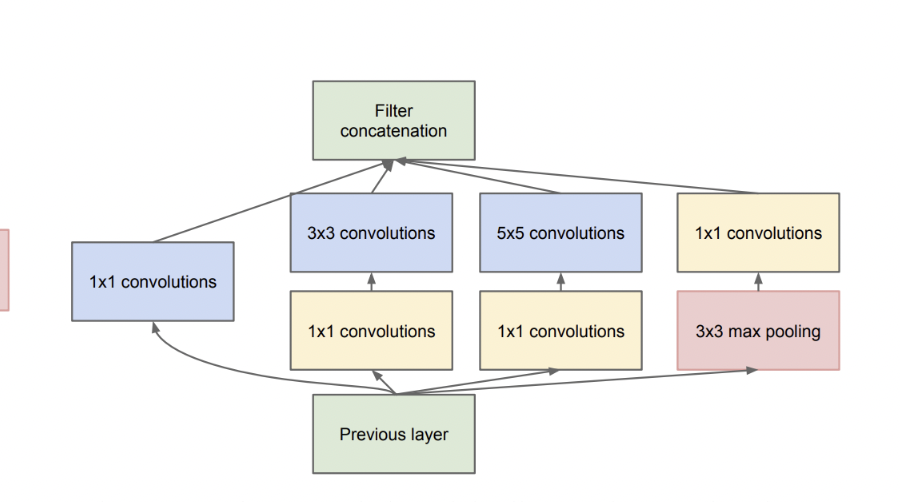

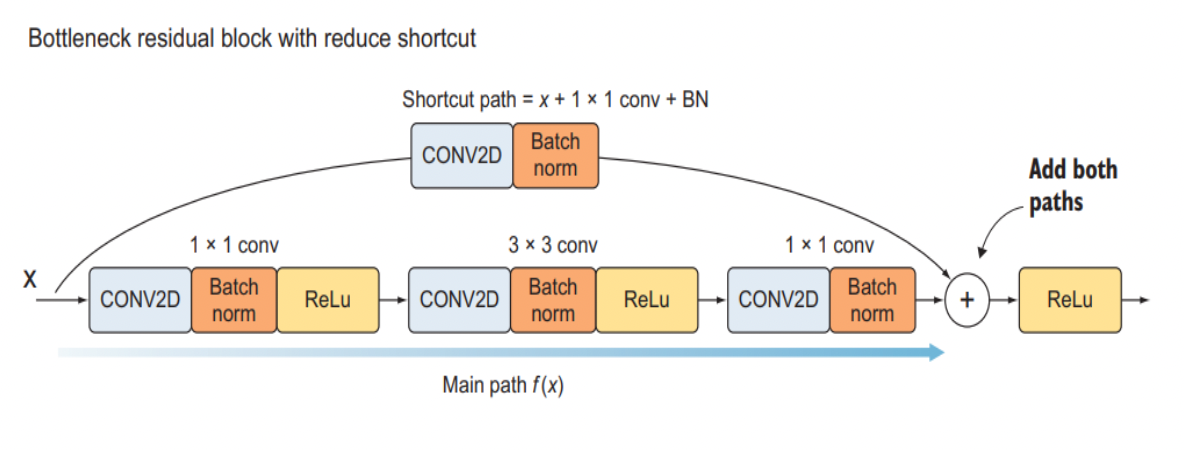

In [ ]:
def residual_block(x, kernel_size, filters, s=2):
    f1,f2,f3 = filters
    x_shortcut = x
    
    # Shortcut Path
    x_shortcut = Conv2D(f3, kernel_size=(1,1), strides=(s,s), padding='valid')(x_shortcut)
    x_shortcut = BatchNormalization()(x_shortcut)
    
    # Main Path
    # First Component
    x = Conv2D(f1, kernel_size=(1,1), strides=(s,s), padding='valid')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Second Component
    x = Conv2D(f2, kernel_size=kernel_size, strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Third Component
    x = Conv2D(f3, kernel_size=(1,1), strides=(1,1), padding='valid')(x)
    x = BatchNormalization()(x)
    
    x = Add()([x,x_shortcut])
    x = Activation('relu')(x)
    
    return x

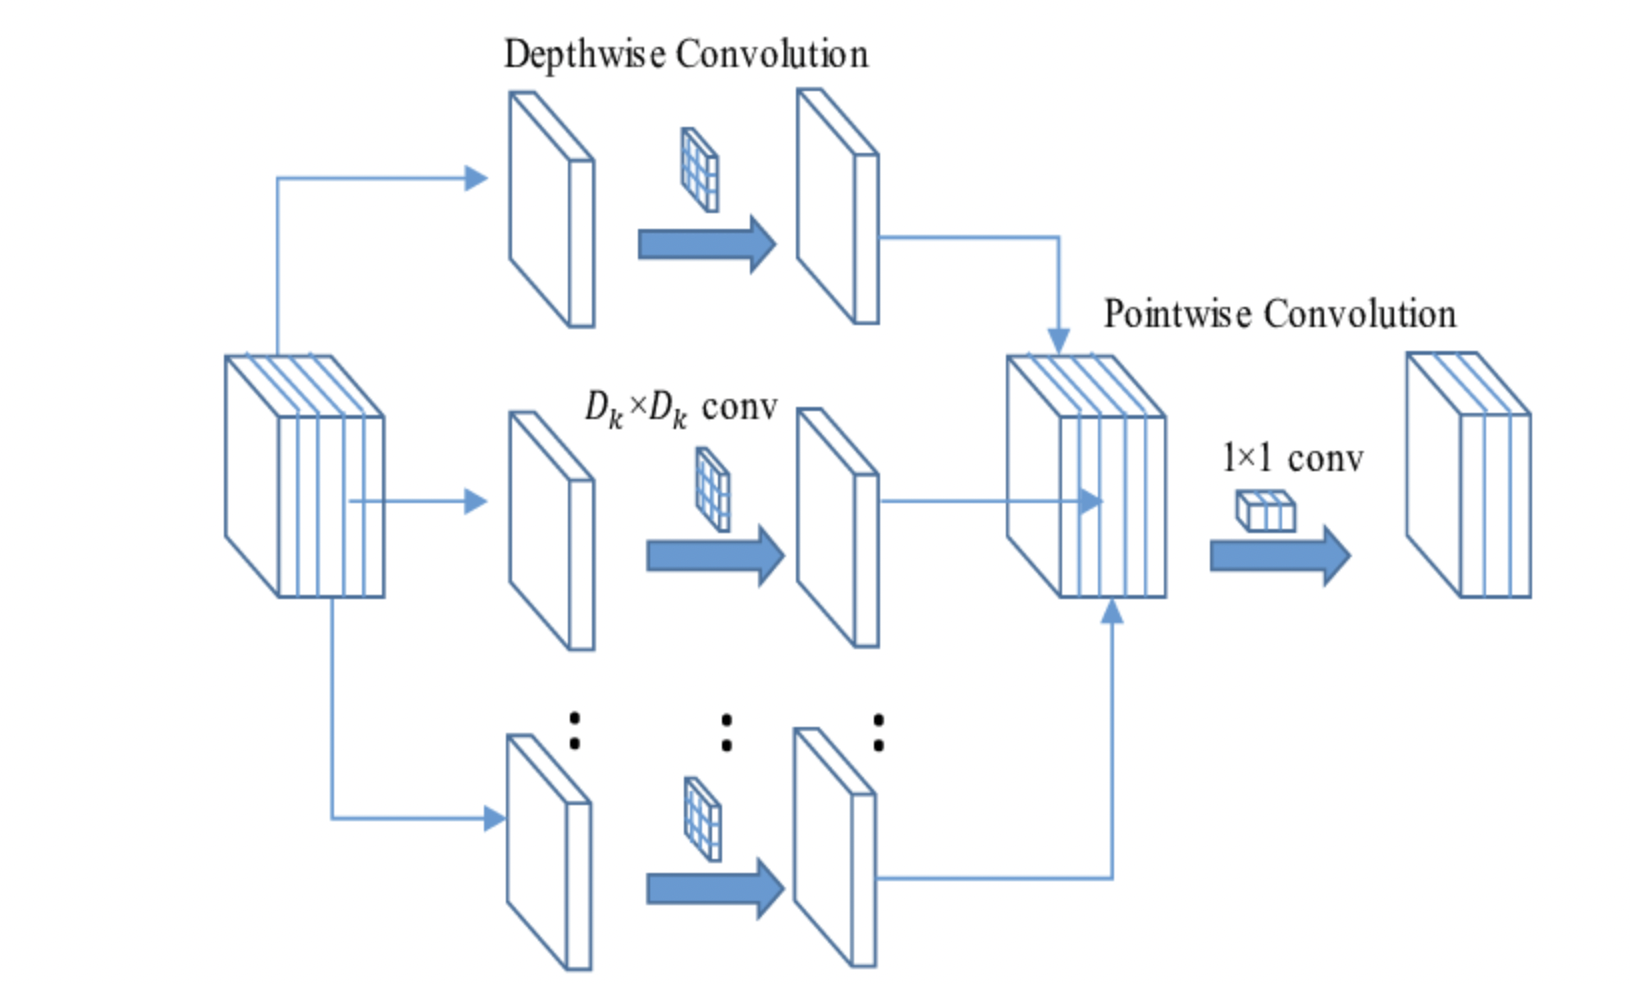

In [ ]:
def mobilenet_block(x, kernel_size, filters, strides):
    x = DepthwiseConv2D(kernel_size=(kernel_size,kernel_size), strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters, kernel_size=(1,1), strides=1, padding='valid')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

In [ ]:
# input_layer=Input(shape=(227,227,3))
# x=Conv2D(32,kernel_size=(7,7),strides=1,padding='same',activation='relu')(input_layer)
# x=MaxPooling2D((3,3),padding='same',strides=(2,2))(x)
# x=inception_module(x,24,96,128,16,32,32,name='inception_1')
# x=inception_module(x,24,96,128,16,32,32,name='inception_2')
# x=residual_block(x,(3,3),[64,64,128],1)
# x=residual_block(x,(3,3),[64,64,128],1)
# x=Flatten()(x)
# x=Dense(1024,activation='relu')(x)
# x=Dense(512,activation='relu')(x)
# output=Dense(10,activation='softmax')(x)

# model=Model(inputs=input_layer,outputs=output)

q1 adv cnn

In [ ]:
input_layer=Input(shape=(224,224,3))
x=Conv2D(32,kernel_size=(11,11),strides=2,padding='same',activation='relu')(input_layer)
x=MaxPooling2D((3,3),strides=2,padding='same')(x)
x=inception_module(x,64,96,128,16,32,32,'inception-1')
x=inception_module(x,64,192,364,48,128,12,'inception-2')
x= GlobalAveragePooling2D()(x)
output=Dense(10,activation='softmax')(x)

model=Model(inputs=input_layer,outputs=output)

In [ ]:
# model.summary()

q2

In [ ]:
input_layer=Input(shape=(227,227,3))
x=Conv2D(32,kernel_size=(7,7),strides=1,padding='same',activation='relu')(input_layer)
x=MaxPooling2D((3,3),strides=2,padding='same')(x)

x=inception_module(x,64,96,128,16,32,32,name='inception-1')
x=inception_module(x,64,96,128,16,32,32,name='inception-2')
x=residual_block(x,kernel_size=(3,3),filters=[64,64,123],s=1)
x=residual_block(x,kernel_size=(3,3),filters=[64,64,123],s=1)

x=Flatten()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)

output=Dense(10,activation='softmax')(x)

model=Model(inputs=input_layer,outputs=output)

#q3

In [ ]:
input_layer=Input(shape=(227,227,3))
x=Conv2D(32,kernel_size=(7,7),strides=1,padding='same',activation='relu')(input_layer)
x=MaxPooling2D((3,3),strides=2,padding='same')(x)

x=residua_block(x,(3,3),[64,64,128],1)
x=residual_block(x,(3,3),[64,64,128],1)
x=inception_module(x,64,96,128,16,32,32)
x=inception_module(x,64,96,128,16,32,32)

x=Flatten()(x)
x=Dense(512,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
output=Dense(10,activation='softmax')(x)

model=Model(inputs=input_layer,outputs=output)


q4

In [ ]:
input_layer=Input(shape=(227,227,3))
x=Conv2D(32,kernel_size=(3,3),sstrides=2,padding='same')(input_layer)
x=BatchNormalization()(x)
x=Activation()(x)

x=mobilenet_block(x,64,(3,3),1)
x=mobilenet_block(x,64,(3,3),1)

x=inception_module(x,160,112,224,24,64,64)
x=inception_module(x,128,128,256,24,64,64)

aux_avg=GlobalAveragePooling2D()(x)
aux_dropout=Dropout(0.4)(x)
aux_dense=Dense(10,activation='softmax')(aux_dropout)

x=inception_module(x,256,160,320,32,128)
x=inception_module(x,384,192,384,48,128,128)

x=GlobalAveragePooling2D()(x)
x=Dropout(0.4)(x)

output=Dense(10,activation='softmax')(x)

model=Model(inputs=input_layer,outputs=output)

Inception Module is a part of google's advance architecture googlenet or inception net v1.
Google RnD Team’s idea - “Instead of choosing a desired filter size in a convolutional layer and deciding where to place the pooling layers, let’s apply all of them all together in one block and call it the inception module.”

what is inception module (draw diagram)
The Inception Net architecture uses a module called the Inception module, which consists of several parallel convolutional layers with different filter sizes, max pooling layers, and 1x1 convolutional layers that reduce the number of channels.

their approach was to add a 1x1 convolution layer before bigger kernel like 3x3 and 5x5 convolution layer to reduce their the number of operations by reducing their depth aka reducing depth dimension reduction.This is also called as bottleneck layer.(draw diagram)


1x1 is also used before max-pooling becuase max-pooling doesnt reduce depth dimension.
we also use global average pooling instead of flatten layer becuase flattening the layer will require high number of parameters. and gap also help in oreducing overfitting.GAP provides a more efficient and computationally inexpensive method of aggregating information from the feature maps. Flattening the feature map requires a large amount of computation and memory, while GAP requires only a single pooling operation per channel.

Uses Auxillary classifiers for prediction and gradient propagation at intermediate parts of the network



residual block
A residual block is a fundamental building block in the ResNet (Residual Network) architecture. It was introduced to address the problem of vanishing gradients in very deep neural networks.

A residual block consists of two or more convolutional layers, along with a shortcut connection that skips one or more layers. The input to the residual block is added to the output of the last convolutional layer through the shortcut connection, which allows the network to learn residual functions.

The residual block can be represented mathematically as:

x = input
f(x) = layers(x)
output = x + f(x)

Here, x is the input to the block, f(x) is the output of the convolutional layers, and output is the final output of the block. The addition operation is performed element-wise, which ensures that the output of the block is always at least as good as the input.

The shortcut connection in the residual block allows the gradients to flow directly through the network without passing through multiple layers. This helps to mitigate the vanishing gradient problem that can occur in very deep neural networks. Additionally, the residual block allows the network to learn residual functions, which can be easier to learn than the original mapping.

Residual blocks are used extensively in the ResNet architecture, which is a deep convolutional neural network that has achieved state-of-the-art performance on many computer vision tasks. The use of residual blocks has enabled ResNet to train very deep neural networks, with over 100 layers, that were previously difficult to train due to the vanishing gradient problem.

ResNets do not have a pooling layer in the network, they instead use strides=2 to downsample the width and height of the image in the reduce layer itself.

Moible net which belongs to a class of efficient models is designed for mobile and embedded vision applications.
In mobile net we use depthwise separable convolutions, this helps in builing light weight models.

depthwise separable convolutions include depthwise convolution and pointwise convolution.
In,depthwise convolution to reduce parameters and computational cost the input is convoled with a set of filters operate  independently on each input channel.

In the pointwise convolution, the output of the depthwise convolution is then convolved with a set of filters that combine the information from different channels to produce the final output.

It uses 2 hyperparameters for Model Lightening: Width Multiplier and Resolution Multiplier.

The role of the width multiplier α is to thin a network uniformly at each layer.
For a given layer and width multiplier α, the number of input channels M becomes αM and the number of output channels N becomes αN. The value of α is typically between [0,1]

Resolution Multiplier: A resolution multiplier ρ is used on the input image and the internal representation of every layer is subsequently reduced by the same multiplier. In practice we implicitly set ρ by setting the input resolution. Value of ρ is typically between [0,1] but as mentioned, in practice the input resolution itself is set typically - 224, 192, 160 or 128